write a python program to get input, and if input is not between 1-20, then output error message.

In [2]:
num = input("Enter a number to pick image for display (1 to 20)")
if num.isdigit():
    print("great job!")
else:
    print(f"{num} is not in the range")

great job!


In [12]:
import cv2
test_set = {
    "cat": "./reference/cats/",
    "dog": "./reference/dogs/"
    }
def read_image(path):
    im = cv2.imread(path)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)   # BGR -> RGB
def resize_image(array):
    return cv2.resize(array, (64,64))


In [8]:
from IPython.display import Image
test_path = f'./test/pic{num}.jpg'
from matplotlib import pyplot as plt

def show_image(array):
    plt.imshow(array)


(280, 300, 3)


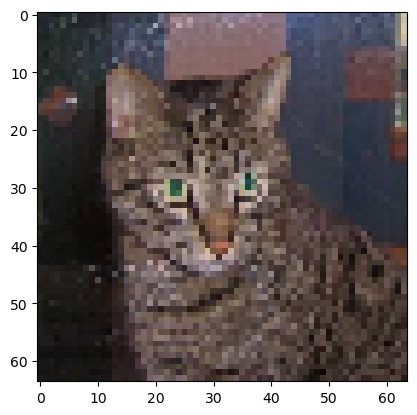

In [14]:
arr = read_image(test_set['cat']+"cat.1.jpg")
print(arr.shape)
new_arr = resize_image(arr)
show_image(new_arr)
